# ANALISIS EXPLORATORIO

# INFO

En el siguiente _notebook_ se procede a la realización del análisis exploratorio y al contraste de hipótesis de las variables del conjunto de datos.

# LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../functions')
import exploratory_analysis as EDA
import warnings
import ppscore as pps

C:\Users\Beltran\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# ruta
data_path = '../data/application_train.csv'

In [4]:
# lectura
data = pd.read_csv(data_path)

In [5]:
# info basica
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Tenemos:
* 307 511 observaciones.
* 122 variables, de las cuales:
    * 65 `float64`
    * 41 `int64`
    * 16 `object`

Para la realización de un primer análisis exploratorio no me resulta necesaria la variable `SK_ID_CURR`. Por tanto, la elimino.

In [6]:
data.drop(['SK_ID_CURR'], axis=1, inplace=True)

# ANÁLISIS

En primer lugar, se observa la distirbución del _target_ en el conjunto de datos.

In [7]:
data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
# ratio de default

print('El ratio de default es de: {}%'.format(round((data.TARGET.value_counts()[1] / len(data)) * 100, 3)))

print('\n')

El ratio de default es de: 8.073%




El número de observaciones en el `TARGET` presenta un claro desequilibrio entre clases. Observo la apariencia dle conjunto de datos mediante una muestra.

In [9]:
data.sample(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
183543,0,Cash loans,F,Y,Y,0,67500.0,288873.0,16713.0,238500.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.008068,-21060,365243,-248.0,-248,64.0,1,0,0,1,0,0,NaN,2.0,3,3,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.405803,0.586740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-530.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
137399,1,Cash loans,M,Y,Y,0,67500.0,170640.0,11533.5,135000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.005144,-18095,-953,-2062.0,-1641,16.0,1,1,1,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.190397,0.210350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-776.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
192132,0,Cash loans,F,N,N,2,157500.0,1575000.0,47884.5,1575000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-14328,-3691,-8214.0,-4316,NaN,1,1,1,1,1,0,NaN,4.0,1,1,SATURDAY,13,0,0,0,1,1,1,Business Entity Type 3,NaN,0.709886,0.612704,0.5082,0.1172,0.9990,0.9864,0.2572,0.48,0.2069,0.7500,0.7083,NaN,0.3698,0.4652,0.2046,0.0240,0.5179,0.1216,0.9990,0.9869,0.2595,0.4834,0.2069,0.7500,0.7083,NaN,0.4040,0.4847,0.2062,0.0255,0.5132,0.1172,0.9990,0.9866,0.2588,0.48,0.2069,0.7500,0.7083,NaN,0.3762,0.4736,0.2057,0.0245,reg oper account,block of flats,0.5118,Monolithic,No,5.0,0.0,5.0,0.0,-2269.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
276239

#### VALORES AUSENTES

Debemos determinar el número de valores ausentes que presenta el conjunto de datos.

In [10]:
nulls = EDA.null_count(data)
nulls

,Total,Porcentaje
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


Grafico el porcentaje de valores ausentes por variable para una mejor visualización.

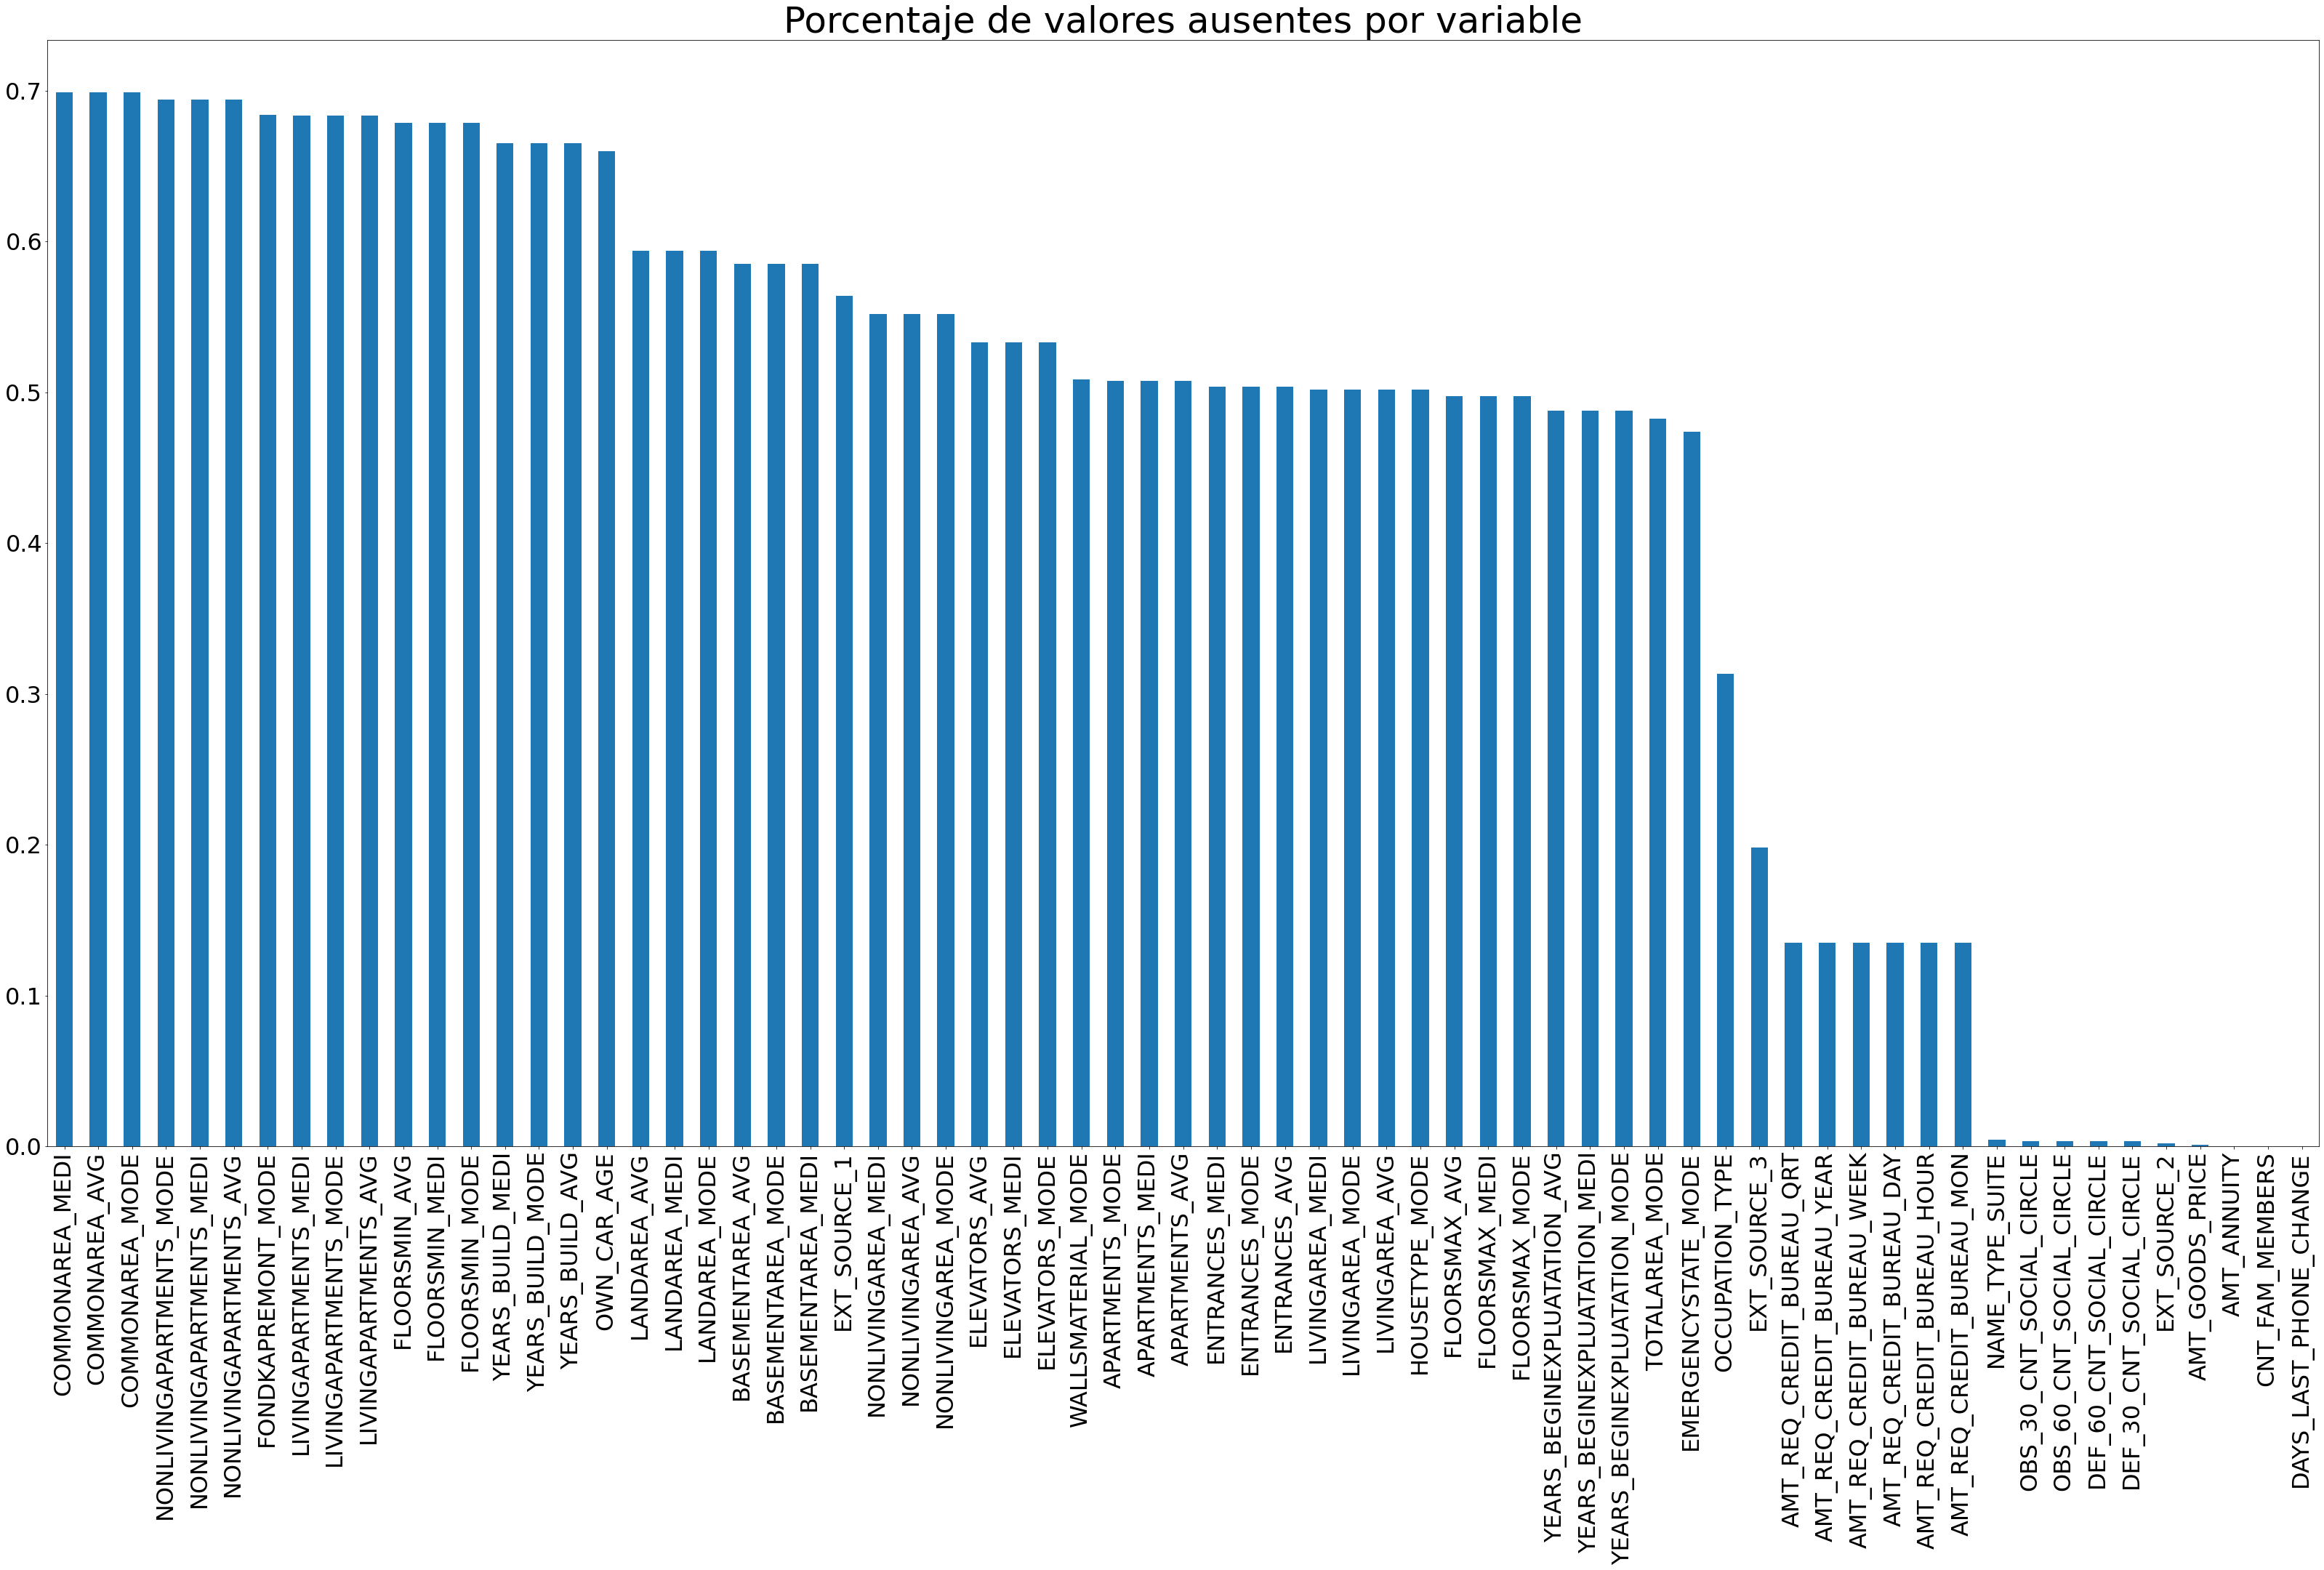

In [11]:
# Grafico de nulls

plt.figure(figsize=(56,28))
plt.title('Porcentaje de valores ausentes por variable', fontsize=50)
nulls.Porcentaje.plot.bar()
plt.xticks(rotation=90, fontsize= 32)
plt.yticks(fontsize= 32);

Se observa un conjunto significatuvo de variables que presentan un porcentaje de registro con valores ausentes u omitidos superior al 60%. Este hecho se tendrá en cuenta más adelante en cuanto al tratamiento de datos, se contemplarán las siguientes opciones:
* Omisión de dichas variables.
* Imputación.
* Tratamiento de los valores ausentes como un caso más.

#### VARIABLES CATEGÓRICAS

A continuación, observamos como se distribuye el `TARGET` en las diferentes clases de las variables categóricas.

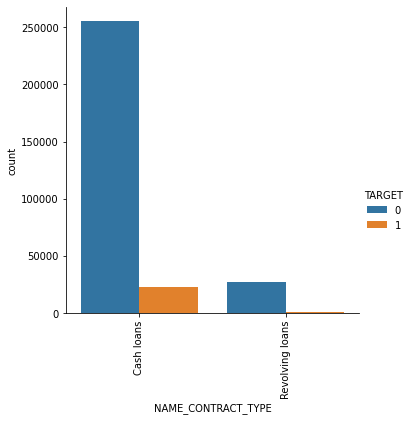

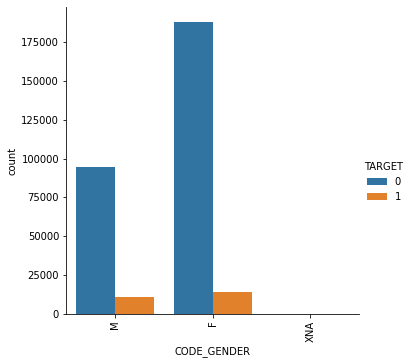

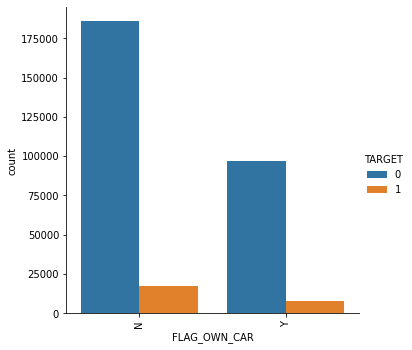

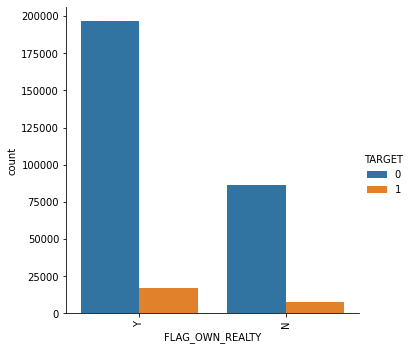

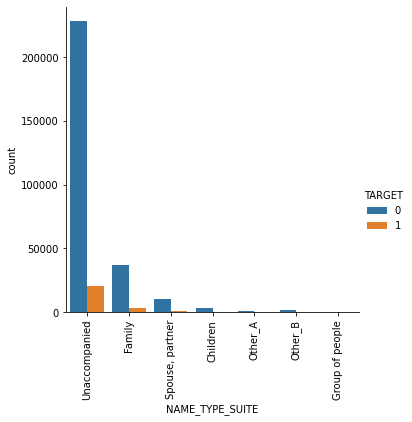

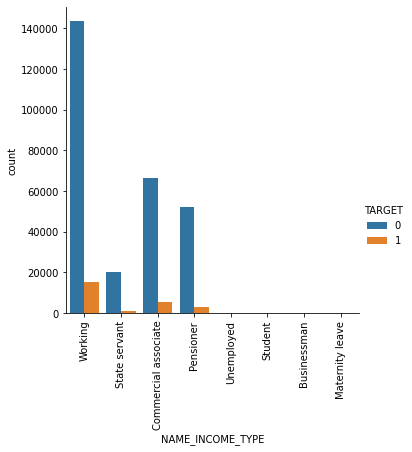

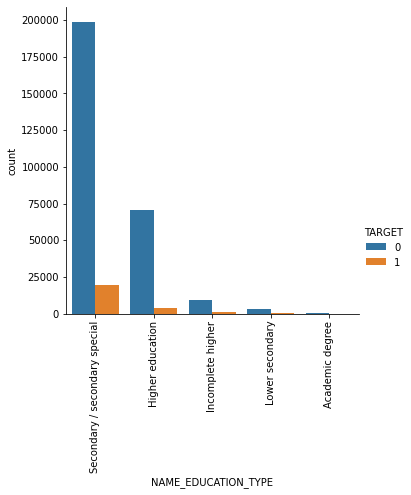

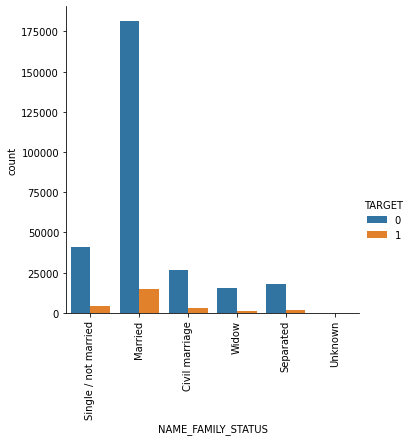

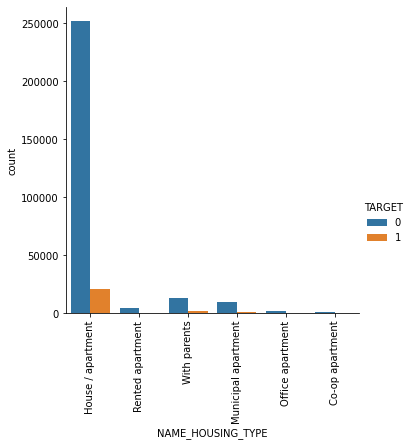

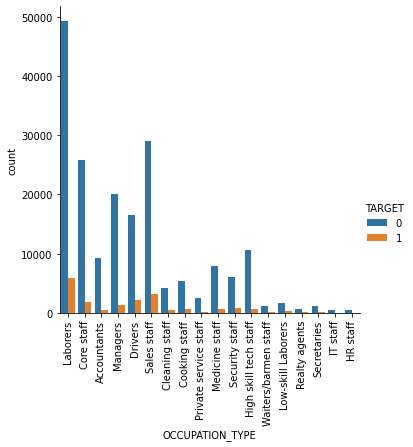

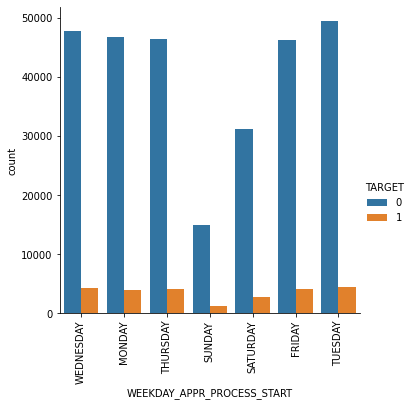

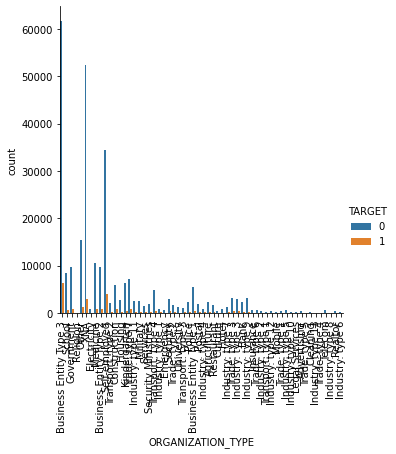

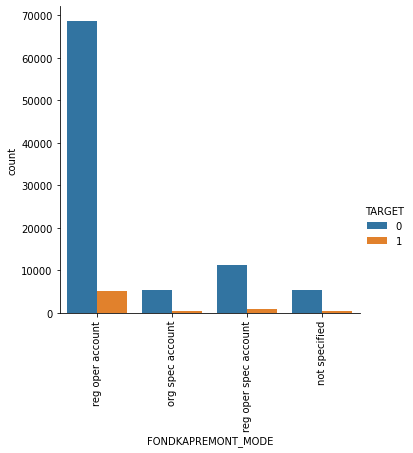

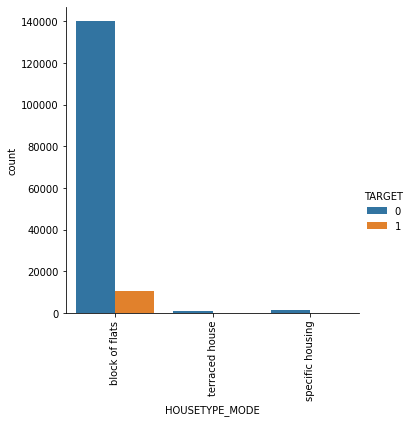

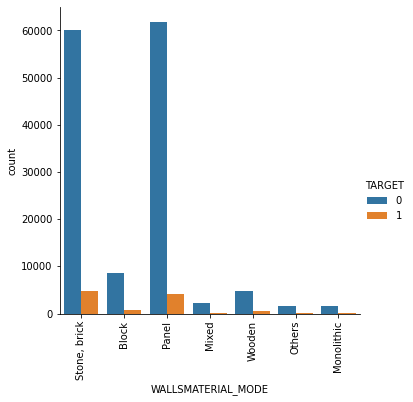

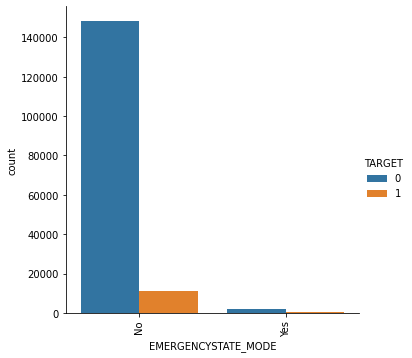

In [12]:
# Graficos de frecuencias en forma de barras de clases de variable categoricas diferenciadas por target

EDA.catplots_categorical(data, 'TARGET')

Parece que tras un primer análisis no se distinguen diferencias significativas en la distribución de las clases de las variables categóricas en función del _target_ .

#### VARIABLES NUMÉRICAS

Lo siguiente es estudiar las diferencias en las distribuciones de densidad de las variables numéricas en función del `TARGET`.

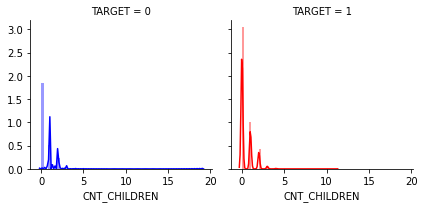

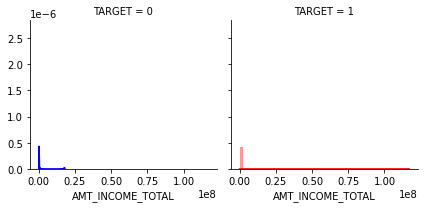

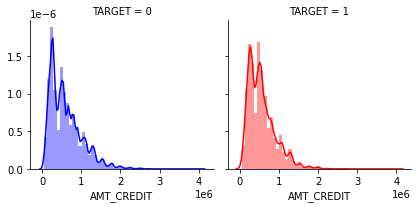

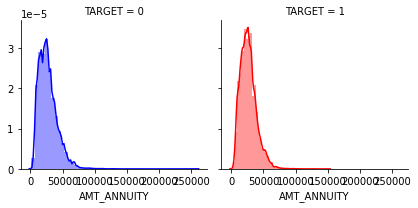

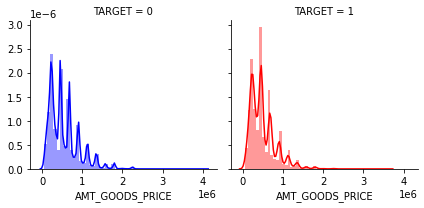

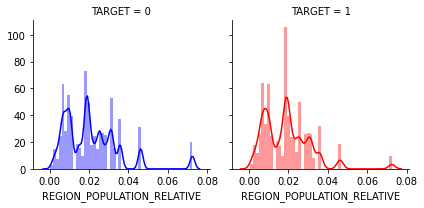

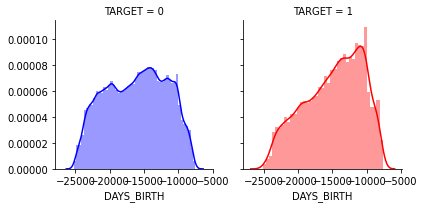

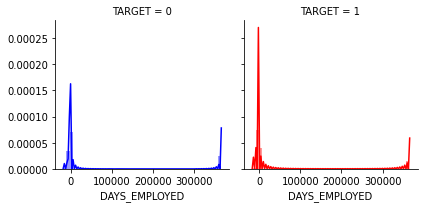

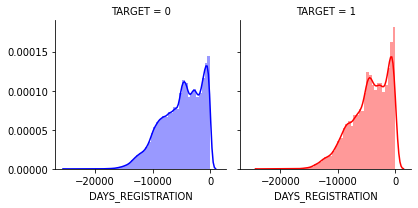

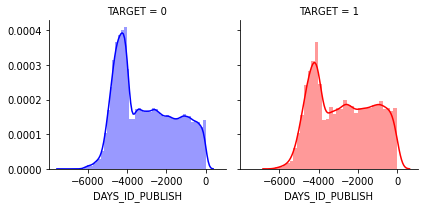

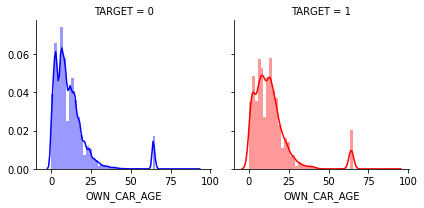

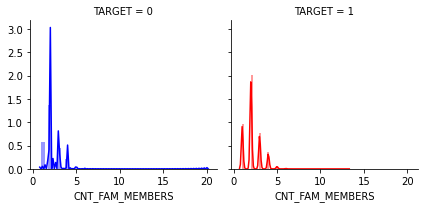

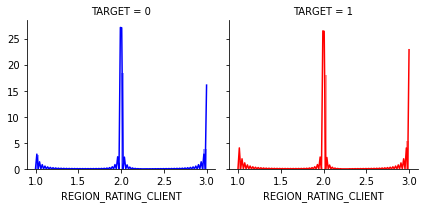

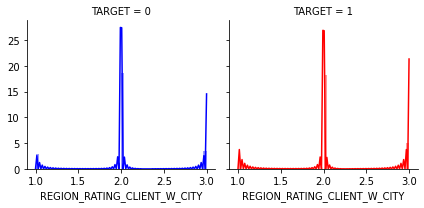

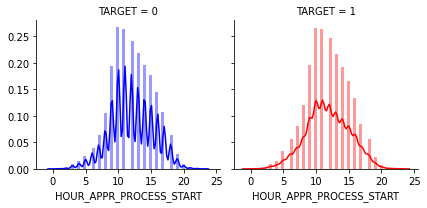

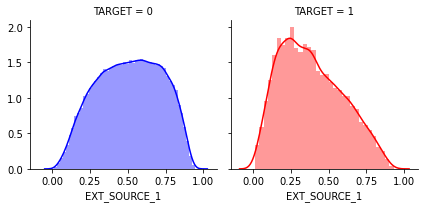

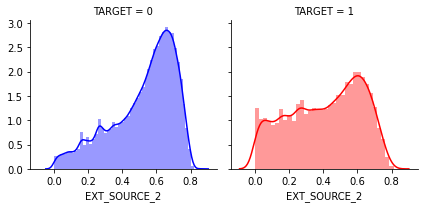

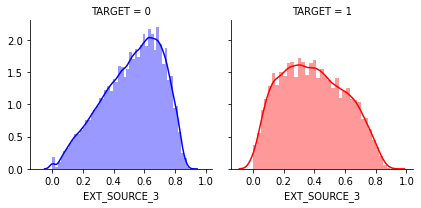

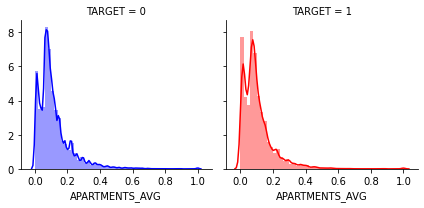

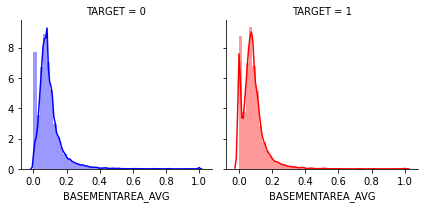

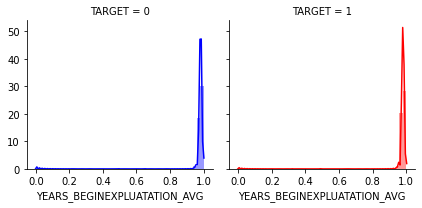

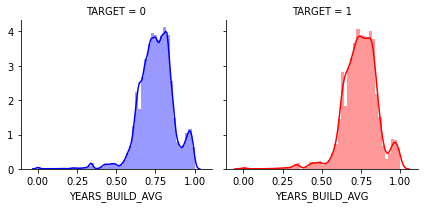

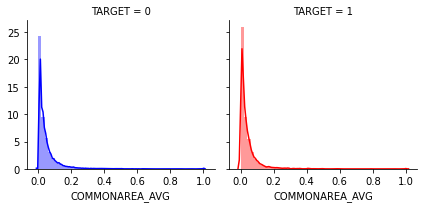

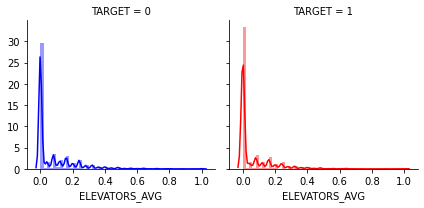

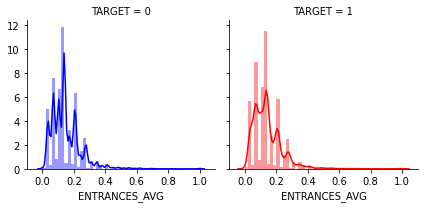

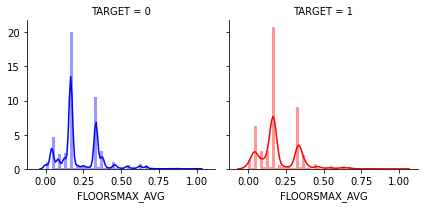

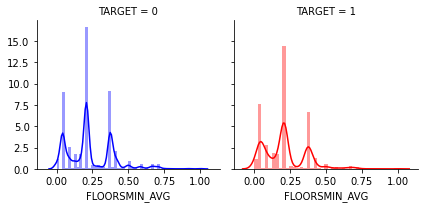

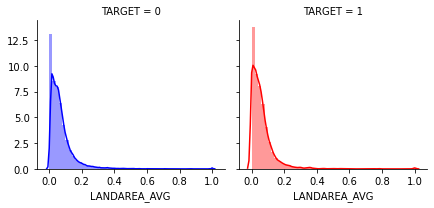

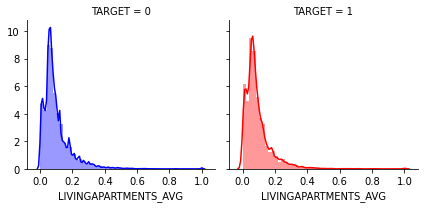

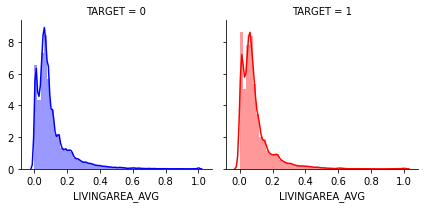

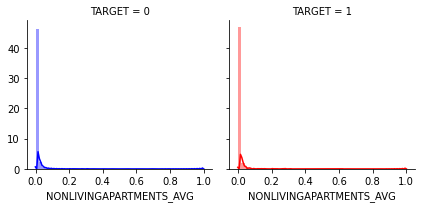

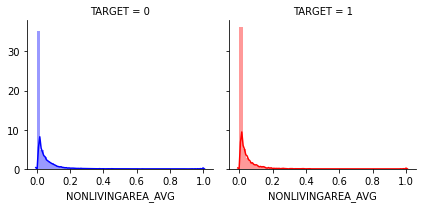

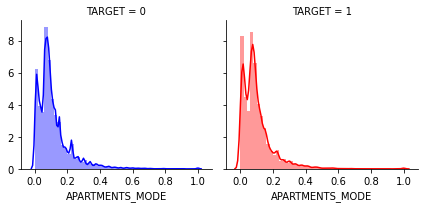

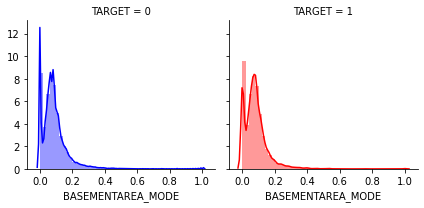

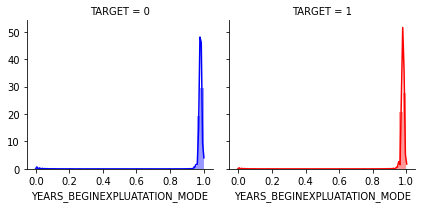

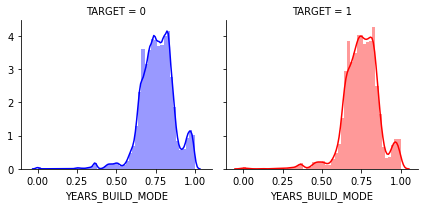

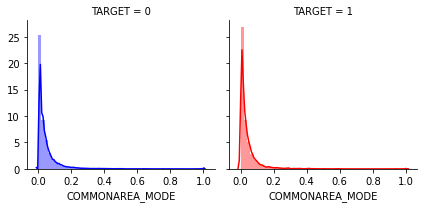

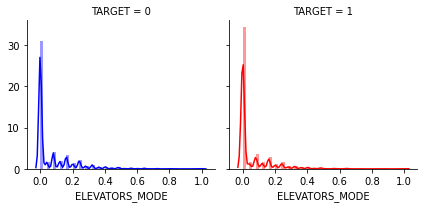

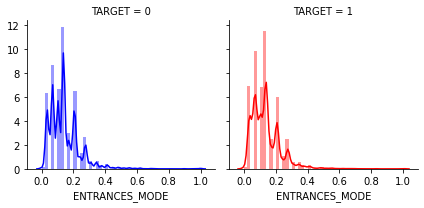

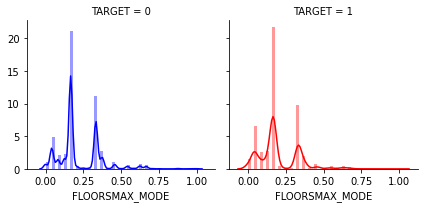

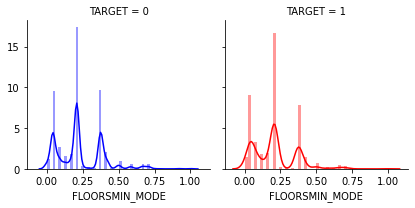

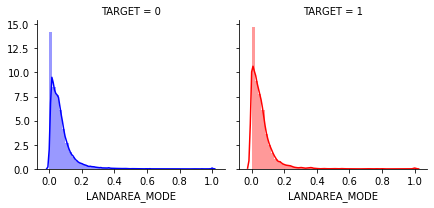

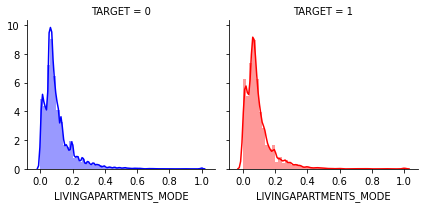

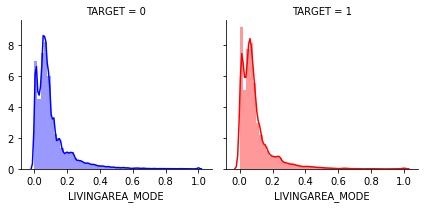

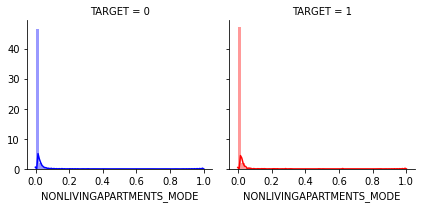

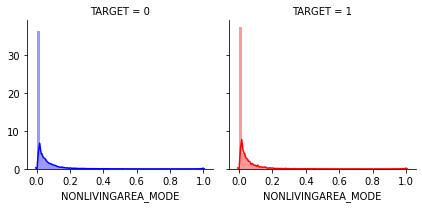

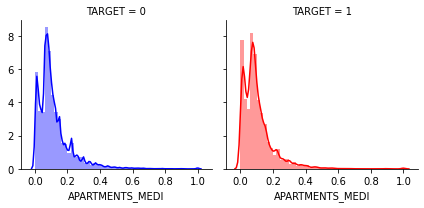

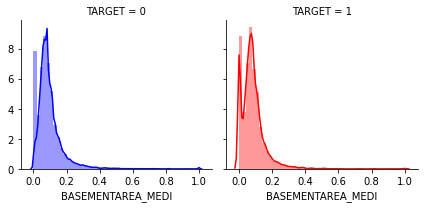

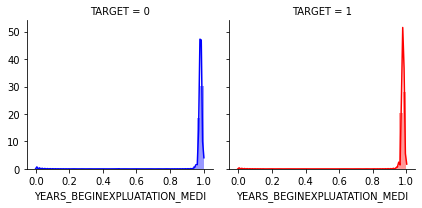

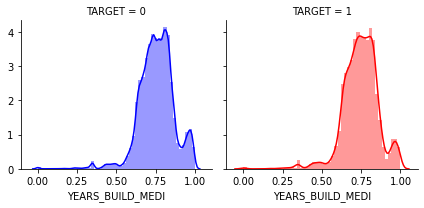

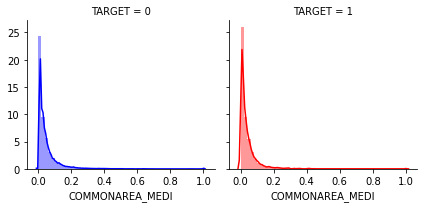

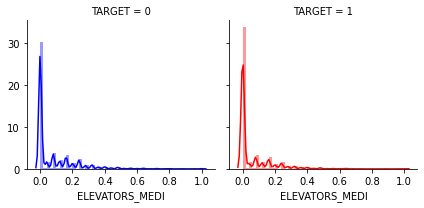

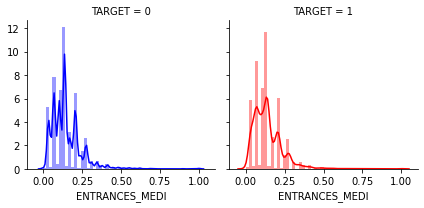

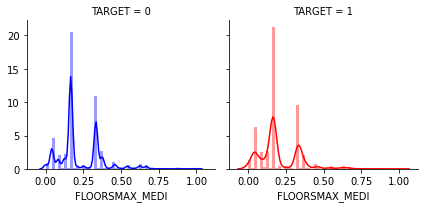

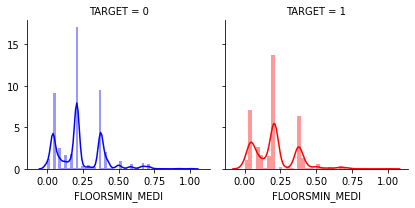

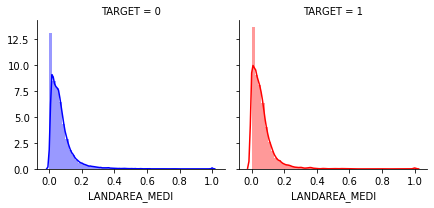

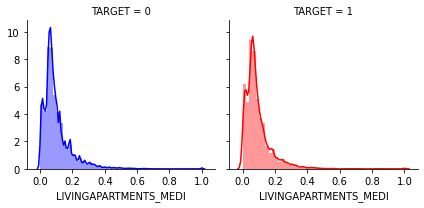

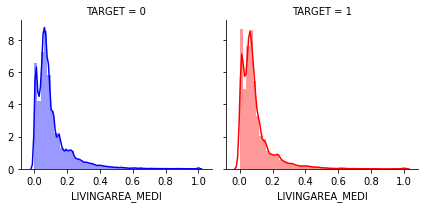

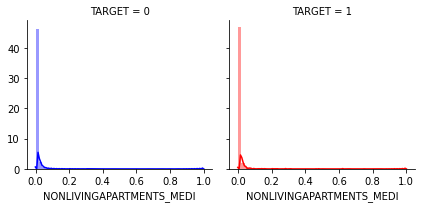

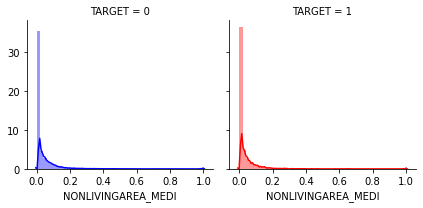

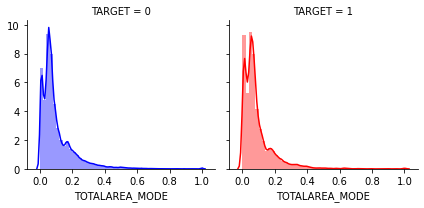

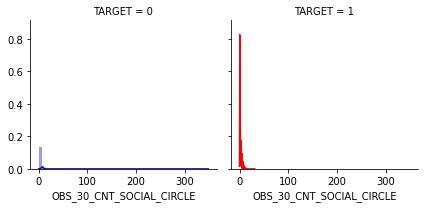

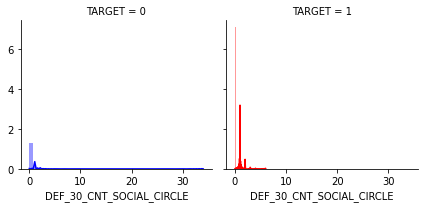

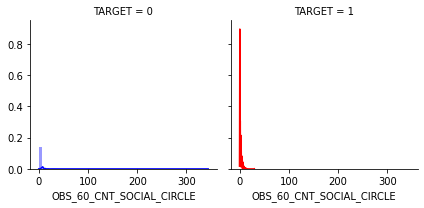

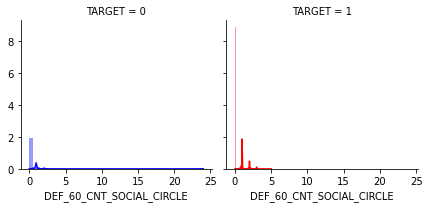

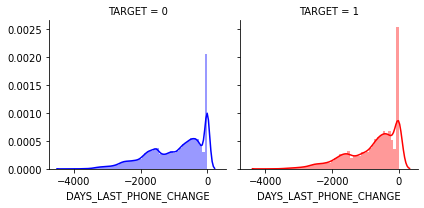

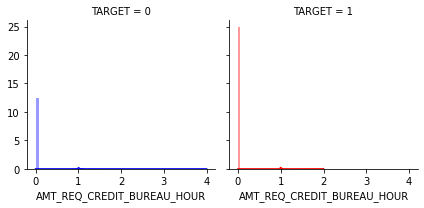

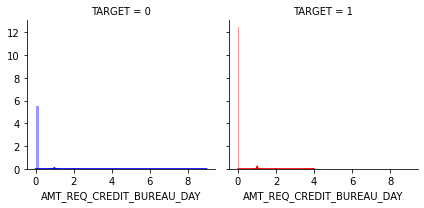

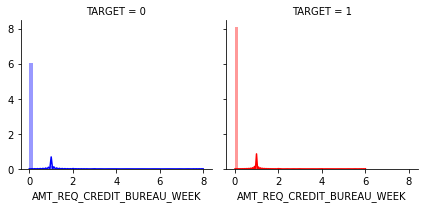

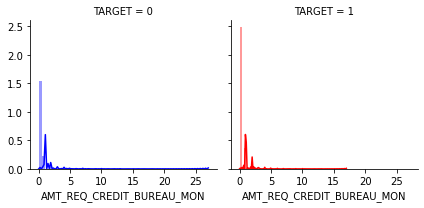

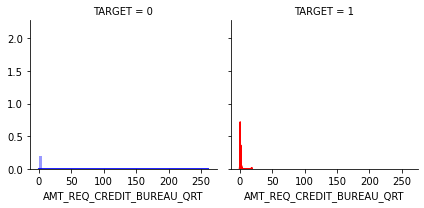

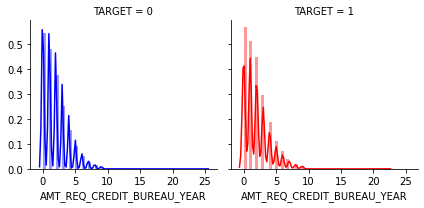

In [13]:
# Histogramas y funciones de densidad de las variables numericas, diferenciadas por el TARGET

EDA.numerical_distplot(data, 'TARGET', num_values=3);

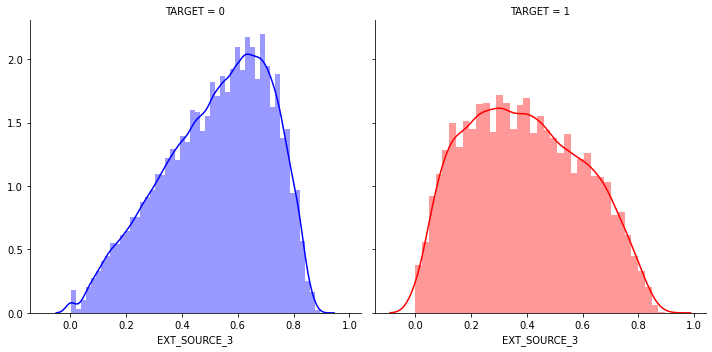

In [39]:
g = sns.FacetGrid(data, col='TARGET', hue='TARGET', hue_kws={'color': ['b', 'r']}, height=5)
g.map(sns.distplot, 'EXT_SOURCE_3');

Parecen observarse distribuciones de densidad significativamente distintas en algunas de las variables, como por ejemplo, `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`, `AMT_ANNUITY` y `DAYS_BIRTH`.

En conjunto de datos dispone de una gran cantidad de variable que vienen codificadas como _one hot_ , procedemos a realizar un estudio de estas aparte.

#### DOCUMENTOS

In [14]:
# para comprobar si entregaron los documentos
documents = data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']

In [15]:
# paso a string
documents = documents.astype('category')

In [16]:
# agrupo por tipo de prestamos y calculo el porcentaje de entrega de cada documento sumando el valor del flag
# y dividiendo por la poblacion total
((pd.concat([documents, data.TARGET], axis = 1).groupby('TARGET').agg('sum') / 
 pd.concat([documents, data.TARGET], axis = 1).groupby('TARGET').agg('count')) * 100).T

TARGET,0,1
FLAG_DOCUMENT_2,0.003184,0.016113
FLAG_DOCUMENT_3,70.406034,77.792548
FLAG_DOCUMENT_4,0.008844,0.000000
FLAG_DOCUMENT_5,1.512632,1.498489
FLAG_DOCUMENT_6,9.045726,6.070493
FLAG_DOCUMENT_7,0.019810,0.012085
FLAG_DOCUMENT_8,8.202741,7.395770
FLAG_DOCUMENT_9,0.397614,0.298087
FLAG_DOCUMENT_10,0.002476,0.000000
FLAG_DOCUMENT_11,0.399029,0.302115


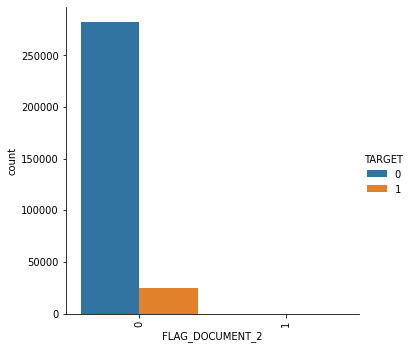

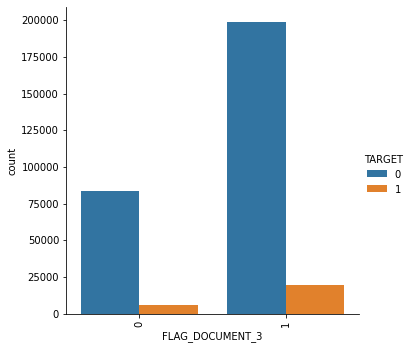

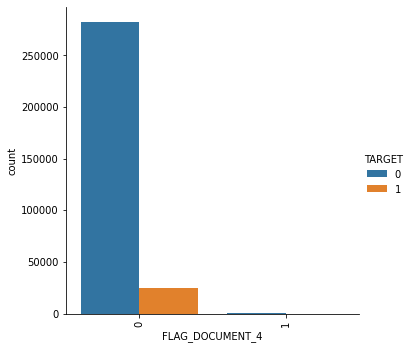

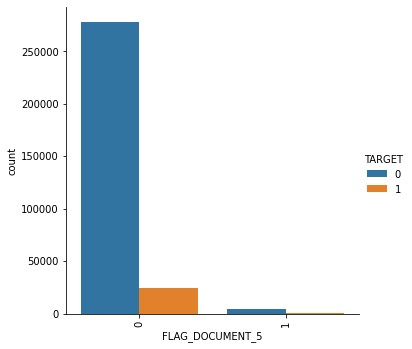

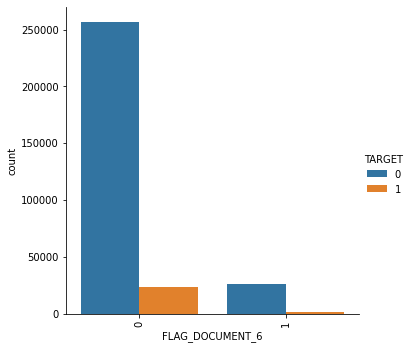

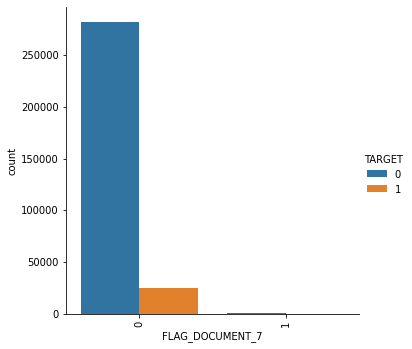

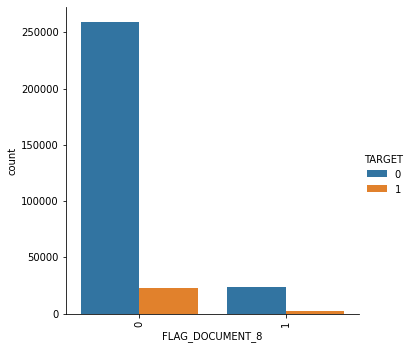

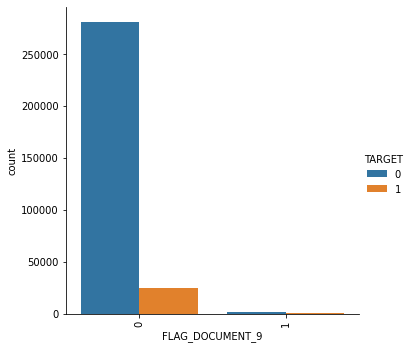

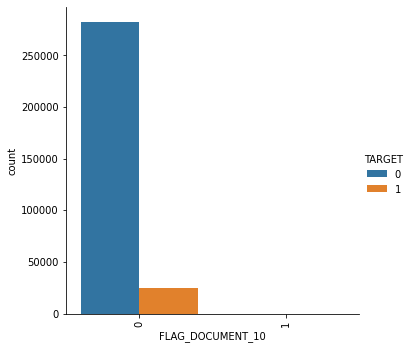

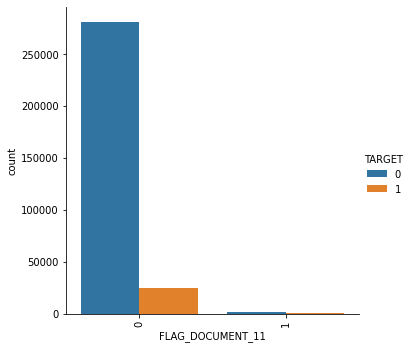

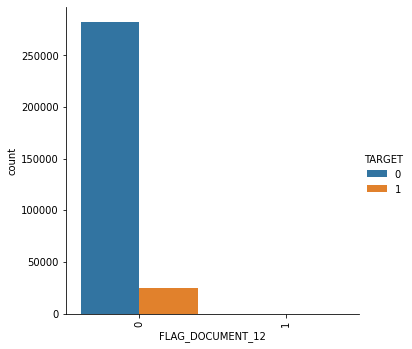

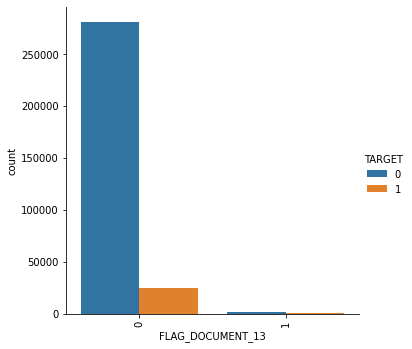

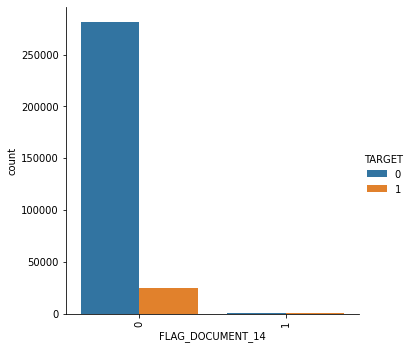

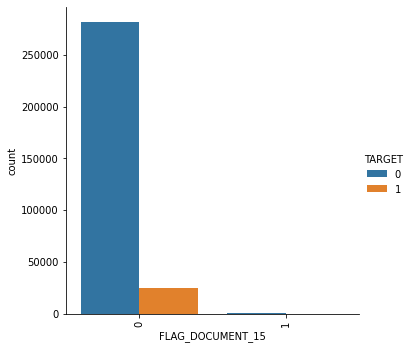

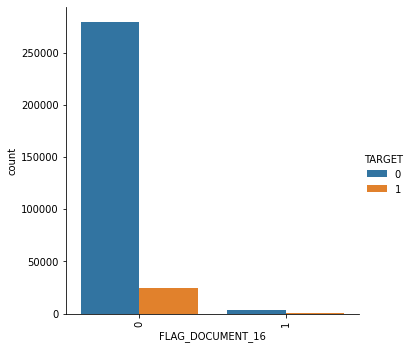

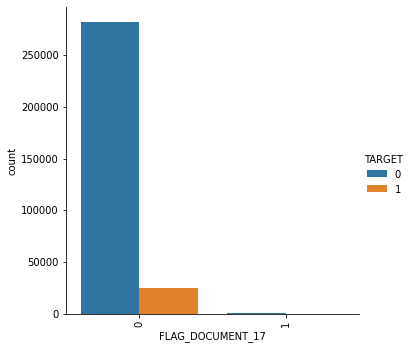

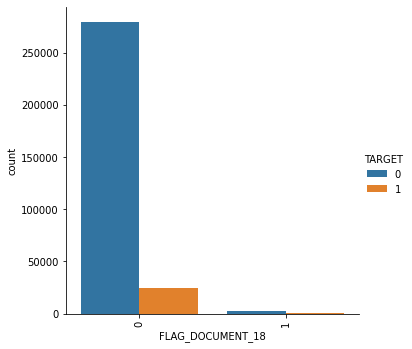

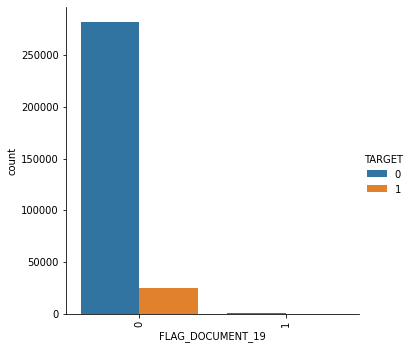

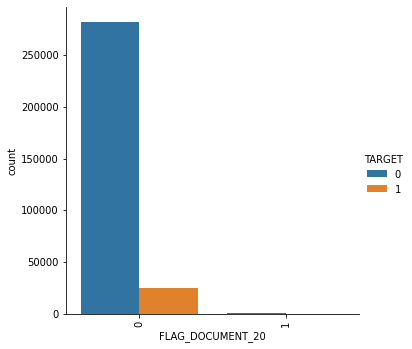

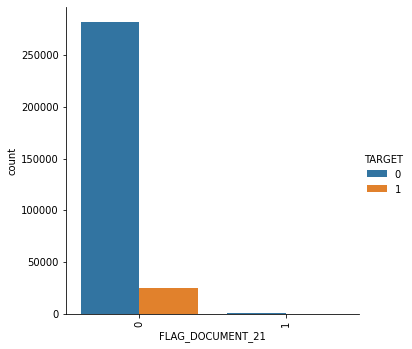

In [17]:
for variable in documents.columns:
    sns.catplot(x=variable, hue='TARGET', kind="count", data=pd.concat([documents, data.TARGET], axis = 1))
    x = plt.xticks(rotation=90)

La distribución del _target_ en función de la entrega de documentos no parece variar.

#### MÓVIL

A continuación, estudio las variables relativas a email y teléfono móvil.

In [18]:
# seleccion de variables
digital = data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL']

In [19]:
# paso a string
digital = digital.astype('category')

In [20]:
# agrupo por tipo de prestamo y calculo el porcentaje de entrega de cada documento sumando el valor del flag
# y dividiendo por la poblacion total
((pd.concat([digital, data.TARGET], axis = 1).groupby('TARGET').agg('sum') / 
 pd.concat([digital, data.TARGET], axis = 1).groupby('TARGET').agg('count')) * 100).T

TARGET,0,1
FLAG_MOBIL,99.999646,100.000000
FLAG_EMP_PHONE,81.465301,87.951662
FLAG_WORK_PHONE,19.599131,23.782477
FLAG_CONT_MOBILE,99.812867,99.818731
FLAG_PHONE,28.423763,24.495468
FLAG_EMAIL,5.684045,5.534743


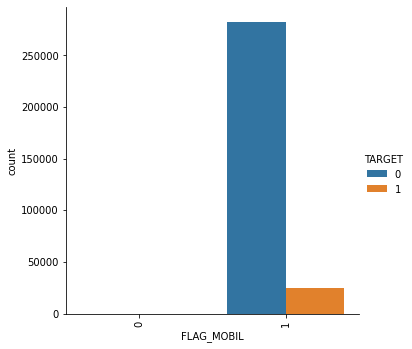

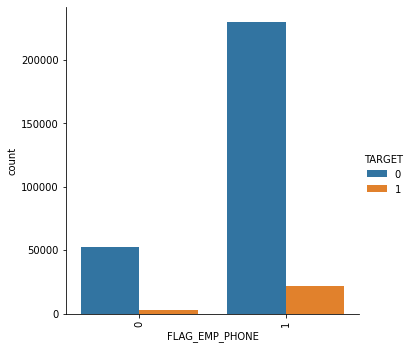

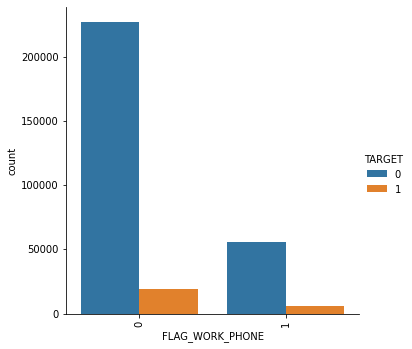

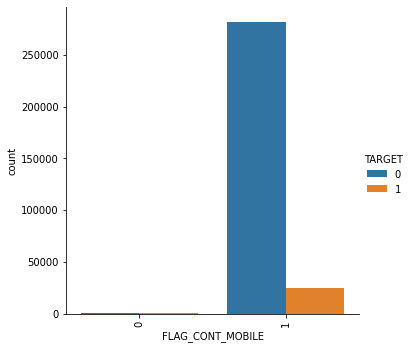

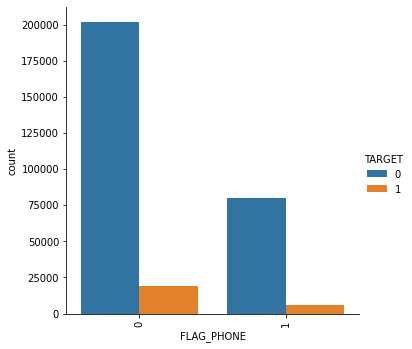

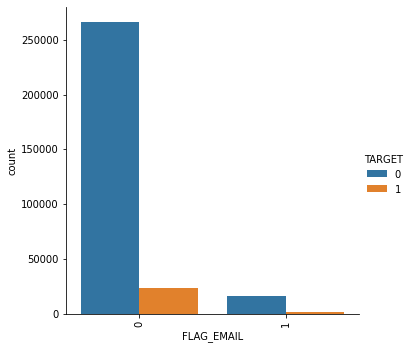

In [21]:
for variable in digital.columns:
    sns.catplot(x=variable, hue='TARGET', kind="count", data=pd.concat([digital, data.TARGET], axis = 1))
    x = plt.xticks(rotation=90)

De nuevo, no parecen observarse diferencias sustanciales en la distribución del _target_.

#### REGIÓN

In [22]:
# escojo las variables de la region
region = data.loc[:, 'REG_REGION_NOT_LIVE_REGION':'LIVE_CITY_NOT_WORK_CITY']

In [23]:
region = region.astype('category') 

In [24]:
# agrupo por tipo de prestamo y calculo el porcentaje de entrega de cada documento sumando el valor del flag
# y dividiendo por la poblacion total
((pd.concat([region, data.TARGET], axis = 1).groupby('TARGET').agg('sum') / 
 pd.concat([region, data.TARGET], axis = 1).groupby('TARGET').agg('count')) * 100).T

TARGET,0,1
REG_REGION_NOT_LIVE_REGION,1.494237,1.744209
REG_REGION_NOT_WORK_REGION,5.031731,5.591138
LIVE_REGION_NOT_WORK_REGION,4.049369,4.253776
REG_CITY_NOT_LIVE_CITY,7.464112,11.838872
REG_CITY_NOT_WORK_CITY,22.408963,30.292044
LIVE_CITY_NOT_WORK_CITY,17.585590,22.167170


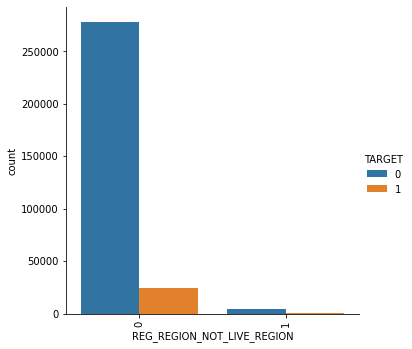

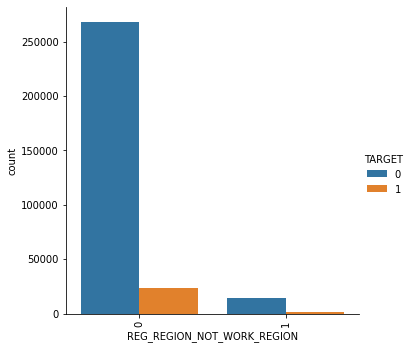

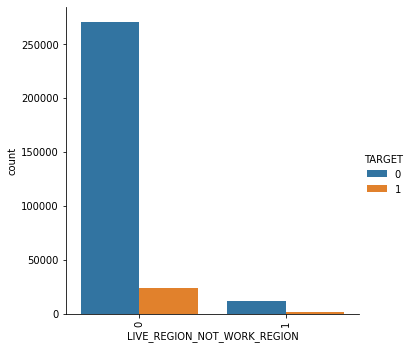

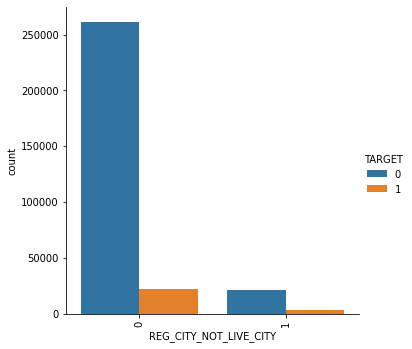

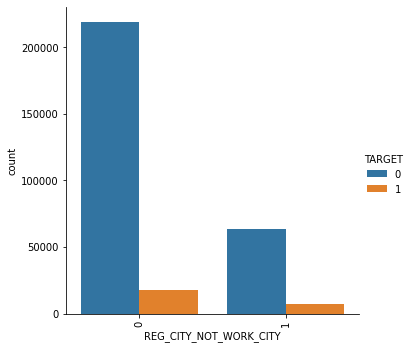

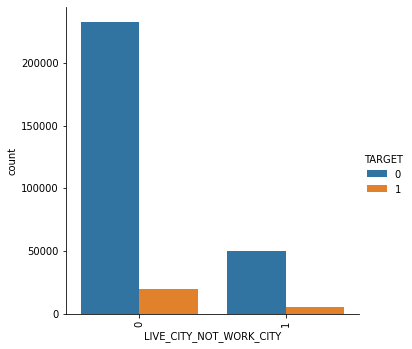

In [25]:
for variable in region.columns:
    sns.catplot(x=variable, hue='TARGET', kind="count", data=pd.concat([region, data.TARGET], axis = 1))
    x = plt.xticks(rotation=90)

En este último grupo de variables _one hot_ tampoco se observa que el _target_ siga una distribución distinta.

#### CONTRASTE DE HIPÓTESIS

Independientemente de las observaciones realizadas mediante el análisis exploratorio, resulta necesario corroborar dichas apreciaciones mediante la realización de un contraste de hipótesis. En este se comproborá si existen diferencias significativas en la distribución del _target_ en la variables del conjunto de datos. Para las variables numéricas se llevará a cabo la prueba T de Student para muestras independientes. Para aquellas variable _one hot_ y categóricas, se procede a la realización de la prueba chi cuadrado.

In [26]:
from scipy import stats
import gc

In [27]:
def variables_irrelevantes(df):
    
    # genero la lista que contendrá las variables a borrar
    
    a_borrar = []
    
    # empiezo por las numericas puras
    
    unos = df[df['TARGET'] == 1].select_dtypes(include=['float64', 'int64'])
    ceros = df[df['TARGET'] == 0].select_dtypes(include=['float64', 'int64'])
    
    for variable in unos.columns.values:
        
        # miro a ver el numero de valores distintos para ver sin son variables flag
        
        if len(df[variable].unique()) > 2:
    
            p_value = stats.ttest_ind(unos[variable], ceros[variable])[1]
    
            if p_value > 0.05: # si es mayor que 0.05 no se rechaza la hipotesis nula
        
                a_borrar.append(variable)
        
            else:
        
                pass
        else:
            
            p_value = stats.chi2_contingency(pd.crosstab(df[variable], df['TARGET']))[1]
            
            if p_value > 0.05: # si es mayor que 0.05 no se rechaza la hipotesis nula
        
                a_borrar.append(variable)
        
            else:
        
                pass
    
    # borro los auxiliares
    del unos
    del ceros
    
    categoricas = df.select_dtypes(include=['object']).columns.values
    
    for variable in categoricas:
        
        p_value = stats.chi2_contingency(pd.crosstab(df[variable], df['TARGET']))[1]
            
        if p_value > 0.05: # si es mayor que 0.05 no se rechaza la hipotesis nula
        
            a_borrar.append(variable)
        
        else:
        
            pass
        
    del categoricas
    
    gc.collect()
    
    return a_borrar

In [28]:
variables_irrelevantes(data)

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Se observa un total de 13 variables en las cuales no se aprecian diferencias significativas, todas ellas _one hot_.